In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [16]:
number_of_points = 100
radius = 1
number_of_tests = 25

In [3]:
def generate_points_within_cube(number_of_points, dimensions, radius):
    cube = np.empty((0, dimensions), float)
    for point in range(number_of_points):
        point = np.random.uniform(-radius, radius, size=dimensions)
        cube = np.append(cube, point)
    return np.split(cube, number_of_points)

In [4]:
def distance_from_sphere_center(point):
    sum = 0.0
    for elem in point:
        sum = sum + elem*elem
    return np.sqrt(sum)

In [5]:
def distance_from_two_points(first, second):
    assert len(first) == len(second)
    dist = 0.0
    for idx in range(0, len(first)):
        dist = dist + np.power(first[idx]-second[idx], 2)
    return dist

In [6]:
def check_if_point_within_sphere(point, radius):
    dist_from_center = distance_from_sphere_center(point)
    if dist_from_center < radius:
        return True
    return False

In [7]:
def calculate_points_within_sphere(number_of_points, dimensions, radius):
    points = generate_points_within_cube(number_of_points, dimensions, radius)
    number_of_hit_within_sphere = 0
    for point in points:
        res = check_if_point_within_sphere(point, radius)
        if res:
            number_of_hit_within_sphere += 1
    return number_of_hit_within_sphere / number_of_points

In [8]:
def calculate_results_A(number_of_tests, number_of_points, dimensions, radius):
    results = []
    for test in range(number_of_tests):
        result = calculate_points_within_sphere(number_of_points, dimensions, radius)
        results.append(result)
    return results, np.mean(results), np.std(results)

In [9]:
def calculate_results_B(number_of_tests, number_of_points, dimensions):
    results = []
    for test in range(number_of_tests):
        points = generate_points_within_cube(number_of_points, dimensions, 1)
        dists = []
        for first, second in itertools.combinations(points, 2):
            dists.append(distance_from_two_points(first, second))
        mean_value = np.mean(dists)
        std_value = np.std(dists)
        results.append(std_value / mean_value * 100)
    return results, np.mean(results), np.std(results)

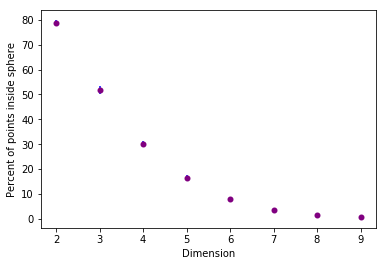

In [15]:
# task: A

dims = []
means = []
stds = []

for dim in range (2, 10):
   dims.append(dim)
   _, mean, std = calculate_results_A(number_of_tests, number_of_points, dim, radius)
   means.append(mean*100)
   stds.append(std*100)
    
plt.xlabel('Dimension')
plt.ylabel('Percent of points inside sphere')
plt.errorbar(dims, means, stds, fmt='o', ecolor='blue', mec='purple', ms=3, mew=3)
plt.show()

[68.382991561350579, 59.260276155137447, 52.655282630217904, 48.349357179504857, 44.633252304897312, 41.814317979654895, 39.449321182562784]
[1.715131241126961, 1.4616515039525657, 1.3078538492283249, 1.0041786955681125, 1.0490962696724198, 0.81030387867919196, 0.8484672448526378]


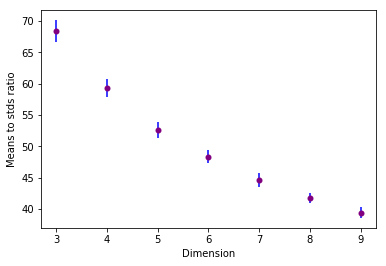

In [13]:
# task B
dims = []
means = []
stds = []

for dim in range(3, 10):
    dims.append(dim)
    _, mean, std = calculate_results_B(number_of_tests, number_of_points, dim)
    means.append(mean)
    stds.append(std)

plt.xlabel('Dimension')
plt.ylabel('Means to stds ratio')
print (means)
print (stds)
plt.errorbar(dims, means, stds, fmt='o', ecolor='blue', mec='purple', ms=3, mew=3)
plt.show()